In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os

#MODEL LIBRARY
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
test = pd.read_csv("IEEE_test_data.csv")
train = pd.read_csv("IEEE_train_data.csv")

In [3]:
test.head()

,id,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,0,4/5/2021 5:36,715.395435,727.824636,16.424948,NaN,57.012666,705.473653,32.653601,29.903539,114.583717,151.190527,220.806147,7.178372,0.518546,Turbine_123
1,1,1/22/2021 18:08,464.797602,477.312037,16.800411,966.249512,42.624767,112.306211,36.228663,33.264307,96.622513,118.003382,262.500356,6.120114,0.655806,Turbine_19
2,2,2/12/2021 23:35,124.409334,116.650399,13.072779,NaN,60.494156,160.127332,33.011556,32.325333,83.454244,98.143848,34.148368,3.910857,0.253755,Turbine_18
3,3,4/20/2021 15:34,328.236440,325.810171,36.818389,854.034149,60.434220,199.202449,36.335106,34.576919,94.008233,105.963958,275.710378,5.411589,0.976659,Turbine_97
4,4,10/27/2021 2:19,436.704926,435.343811,27.606645,938.269928,55.116486,408.465846,33.643038,32.837904,99.589046,113.876025,62.810726,6.096257,0.374731,Turbine_120


In [4]:
train.head()

,id,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,0,6/22/2021 13:15,59.071225,59.117203,35.765579,NaN,64.812227,167.234988,31.835583,35.661191,18.228060,24.117071,316.953893,4.016191,0.524196,Turbine_01,48.670906
1,1,11/6/2021 17:40,258.278976,253.123637,33.392501,789.391492,57.227210,223.845406,32.870656,32.916340,84.444679,102.651681,70.390775,5.198709,0.311840,Turbine_97,47.779032
2,2,12/23/2021 21:08,234.884260,236.785260,33.320189,NaN,47.570285,182.448718,33.043858,29.726347,19.863061,38.311028,302.287781,5.443600,0.367809,Turbine_158,45.542946
3,3,1/2/2021 16:01,50.535151,37.784692,NaN,NaN,33.838225,14.912772,33.752039,30.534683,94.085461,96.431728,93.148946,3.971027,0.631113,Turbine_20,47.515691
4,4,12/6/2021 17:46,247.842835,241.342895,32.897556,NaN,64.972858,226.304581,32.558620,32.711412,93.393299,103.011902,140.825768,4.746520,0.341984,Turbine_20,44.625755


In [5]:
train.isna().sum()

id                                             0
timestamp                                      0
active_power_calculated_by_converter          10
active_power_raw                              17
ambient_temperature                         9797
generator_speed                           316836
generator_winding_temp_max                     1
grid_power10min_average                       35
nc1_inside_temp                              232
nacelle_temp                                 218
reactice_power_calculated_by_converter         4
reactive_power                                 2
wind_direction_raw                             7
wind_speed_raw                                 1
wind_speed_turbulence                         15
turbine_id                                     4
Target                                         0
dtype: int64

In [6]:
train.generator_speed.isna().sum() / train.generator_speed.shape[0] *100

53.588481138761146

In [7]:
train.drop(columns='generator_speed',inplace=True)

In [8]:
train.isna().sum()

id                                           0
timestamp                                    0
active_power_calculated_by_converter        10
active_power_raw                            17
ambient_temperature                       9797
generator_winding_temp_max                   1
grid_power10min_average                     35
nc1_inside_temp                            232
nacelle_temp                               218
reactice_power_calculated_by_converter       4
reactive_power                               2
wind_direction_raw                           7
wind_speed_raw                               1
wind_speed_turbulence                       15
turbine_id                                   4
Target                                       0
dtype: int64

In [9]:
mean = train.ambient_temperature.mean()

In [10]:
train.loc[train['ambient_temperature'].isnull(),'ambient_temperature' ] = mean

In [13]:
mean2 = train.active_power_calculated_by_converter.mean()
train.loc[train['active_power_calculated_by_converter'].isnull(),'active_power_calculated_by_converter' ] = mean2

In [15]:
mean3 = train.active_power_raw .mean()
train.loc[train['active_power_raw'].isnull(),'active_power_raw' ] = mean3

In [16]:
mean4 = train.generator_winding_temp_max.mean()
train.loc[train['generator_winding_temp_max'].isnull(),'generator_winding_temp_max' ] = mean4

In [17]:
mean5 = train.grid_power10min_average.mean()
train.loc[train['grid_power10min_average'].isnull(),'grid_power10min_average' ] = mean5

In [18]:
mean6 = train.nc1_inside_temp.mean()
train.loc[train['nc1_inside_temp'].isnull(),'nc1_inside_temp' ] = mean6

In [19]:
mean7 = train.nacelle_temp.mean()
train.loc[train['nacelle_temp'].isnull(),'nacelle_temp' ] = mean7

In [20]:
mean8 = train.reactice_power_calculated_by_converter.mean()
train.loc[train['reactice_power_calculated_by_converter'].isnull(),'reactice_power_calculated_by_converter' ] = mean8

In [21]:
mean9 = train.reactive_power.mean()
train.loc[train['reactive_power'].isnull(),'reactive_power' ] = mean9

In [23]:
mean10 = train.wind_direction_raw .mean()
train.loc[train['wind_direction_raw'].isnull(),'wind_direction_raw' ] = mean10

In [24]:
mean11 = train.wind_speed_raw .mean()
train.loc[train['wind_speed_raw'].isnull(),'wind_speed_raw' ] = mean11

In [25]:
mean12 = train.wind_speed_turbulence.mean()
train.loc[train['wind_speed_turbulence'].isnull(),'wind_speed_turbulence' ] = mean12

In [26]:
train.isna().sum()

id                                        0
timestamp                                 0
active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                4
Target                                    0
dtype: int64

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591239 entries, 0 to 591238
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      591239 non-null  int64  
 1   timestamp                               591239 non-null  object 
 2   active_power_calculated_by_converter    591239 non-null  float64
 3   active_power_raw                        591239 non-null  float64
 4   ambient_temperature                     591239 non-null  float64
 5   generator_winding_temp_max              591239 non-null  float64
 6   grid_power10min_average                 591239 non-null  float64
 7   nc1_inside_temp                         591239 non-null  float64
 8   nacelle_temp                            591239 non-null  float64
 9   reactice_power_calculated_by_converter  591239 non-null  float64
 10  reactive_power                          5912

In [41]:
test.isna().sum()

id                                             0
timestamp                                      0
active_power_calculated_by_converter           7
active_power_raw                              10
ambient_temperature                         5335
generator_speed                           170739
generator_winding_temp_max                     0
grid_power10min_average                       17
nc1_inside_temp                              123
nacelle_temp                                 125
reactice_power_calculated_by_converter         1
reactive_power                                 5
wind_direction_raw                             2
wind_speed_raw                                 2
wind_speed_turbulence                          7
turbine_id                                     1
dtype: int64

In [42]:
test.generator_speed.isna().sum() / test.generator_speed.shape[0] *100

53.63079532604599

In [44]:
test.drop(columns='generator_speed',inplace=True)

In [45]:
mean1 = test.active_power_calculated_by_converter .mean()
test.loc[test['active_power_calculated_by_converter'].isnull(),'active_power_calculated_by_converter' ] = mean1

In [46]:
mean2 = test.active_power_raw.mean()
test.loc[test['active_power_raw'].isnull(),'active_power_raw' ] = mean2

In [109]:
mean3 = test.ambient_temperature.mean()
test.loc[test['ambient_temperature'].isnull(),'ambient_temperature' ] = mean3

In [48]:
mean4 = test.grid_power10min_average.mean()
test.loc[test['grid_power10min_average'].isnull(),'grid_power10min_average' ] = mean4

In [49]:
mean5 = test.nc1_inside_temp.mean()
test.loc[test['nc1_inside_temp'].isnull(),'nc1_inside_temp' ] = mean5

In [50]:
mean6 = test.nacelle_temp.mean()
test.loc[test['nacelle_temp'].isnull(),'nacelle_temp' ] = mean6

In [51]:
mean7 = test.reactice_power_calculated_by_converter.mean()
test.loc[test['reactice_power_calculated_by_converter'].isnull(),'reactice_power_calculated_by_converter' ] = mean7

In [52]:
mean8 = test.reactive_power.mean()
test.loc[test['reactive_power'].isnull(),'reactive_power' ] = mean8

In [53]:
mean9 = test.wind_direction_raw .mean()
test.loc[test['wind_direction_raw'].isnull(),'wind_direction_raw' ] = mean9

In [54]:
mean10 = test.wind_speed_raw.mean()
test.loc[test['wind_speed_raw'].isnull(),'wind_speed_raw' ] = mean10

In [57]:
mean11 = test.wind_speed_turbulence.mean()
test.loc[test['wind_speed_turbulence'].isnull(),'wind_speed_turbulence' ] = mean11

In [58]:
test.isna().sum()

id                                        0
timestamp                                 0
active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                1
dtype: int64

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318360 entries, 0 to 318359
Data columns (total 15 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      318360 non-null  int64  
 1   timestamp                               318360 non-null  object 
 2   active_power_calculated_by_converter    318360 non-null  float64
 3   active_power_raw                        318360 non-null  float64
 4   ambient_temperature                     318360 non-null  float64
 5   generator_winding_temp_max              318360 non-null  float64
 6   grid_power10min_average                 318360 non-null  float64
 7   nc1_inside_temp                         318360 non-null  float64
 8   nacelle_temp                            318360 non-null  float64
 9   reactice_power_calculated_by_converter  318360 non-null  float64
 10  reactive_power                          3183

In [60]:
round(100*(test.isnull().sum()/len(test.index)),2)

id                                        0.0
timestamp                                 0.0
active_power_calculated_by_converter      0.0
active_power_raw                          0.0
ambient_temperature                       0.0
generator_winding_temp_max                0.0
grid_power10min_average                   0.0
nc1_inside_temp                           0.0
nacelle_temp                              0.0
reactice_power_calculated_by_converter    0.0
reactive_power                            0.0
wind_direction_raw                        0.0
wind_speed_raw                            0.0
wind_speed_turbulence                     0.0
turbine_id                                0.0
dtype: float64

In [61]:
test['timestamp'] = pd.to_datetime(test['timestamp'],format='%m/%d/%Y %H:%M')
test['year'] = test['timestamp'].dt.year 
test['month'] = test['timestamp'].dt.month 
test['day'] = test['timestamp'].dt.day
test['Hour'] = test['timestamp'].dt.hour 
test['minute'] = test['timestamp'].dt.minute 
test.head()

,id,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,year,month,day,Hour,minute
0,0,2021-04-05 05:36:00,715.395435,727.824636,16.424948,57.012666,705.473653,32.653601,29.903539,114.583717,151.190527,220.806147,7.178372,0.518546,Turbine_123,2021,4,5,5,36
1,1,2021-01-22 18:08:00,464.797602,477.312037,16.800411,42.624767,112.306211,36.228663,33.264307,96.622513,118.003382,262.500356,6.120114,0.655806,Turbine_19,2021,1,22,18,8
2,2,2021-02-12 23:35:00,124.409334,116.650399,13.072779,60.494156,160.127332,33.011556,32.325333,83.454244,98.143848,34.148368,3.910857,0.253755,Turbine_18,2021,2,12,23,35
3,3,2021-04-20 15:34:00,328.236440,325.810171,36.818389,60.434220,199.202449,36.335106,34.576919,94.008233,105.963958,275.710378,5.411589,0.976659,Turbine_97,2021,4,20,15,34
4,4,2021-10-27 02:19:00,436.704926,435.343811,27.606645,55.116486,408.465846,33.643038,32.837904,99.589046,113.876025,62.810726,6.096257,0.374731,Turbine_120,2021,10,27,2,19


In [28]:
train['timestamp'] = pd.to_datetime(train['timestamp'],format='%m/%d/%Y %H:%M')
train['year'] = train['timestamp'].dt.year 
train['month'] = train['timestamp'].dt.month 
train['day'] = train['timestamp'].dt.day
train['Hour'] = train['timestamp'].dt.hour 
train['minute'] = train['timestamp'].dt.minute 
train.head()

,id,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,...,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,year,month,day,Hour,minute
0,0,2021-06-22 13:15:00,59.071225,59.117203,35.765579,64.812227,167.234988,31.835583,35.661191,18.228060,...,316.953893,4.016191,0.524196,Turbine_01,48.670906,2021,6,22,13,15
1,1,2021-11-06 17:40:00,258.278976,253.123637,33.392501,57.227210,223.845406,32.870656,32.916340,84.444679,...,70.390775,5.198709,0.311840,Turbine_97,47.779032,2021,11,6,17,40
2,2,2021-12-23 21:08:00,234.884260,236.785260,33.320189,47.570285,182.448718,33.043858,29.726347,19.863061,...,302.287781,5.443600,0.367809,Turbine_158,45.542946,2021,12,23,21,8
3,3,2021-01-02 16:01:00,50.535151,37.784692,25.575695,33.838225,14.912772,33.752039,30.534683,94.085461,...,93.148946,3.971027,0.631113,Turbine_20,47.515691,2021,1,2,16,1
4,4,2021-12-06 17:46:00,247.842835,241.342895,32.897556,64.972858,226.304581,32.558620,32.711412,93.393299,...,140.825768,4.746520,0.341984,Turbine_20,44.625755,2021,12,6,17,46


In [29]:
round(100*(train.isnull().sum()/len(train.index)),2)

id                                        0.0
timestamp                                 0.0
active_power_calculated_by_converter      0.0
active_power_raw                          0.0
ambient_temperature                       0.0
generator_winding_temp_max                0.0
grid_power10min_average                   0.0
nc1_inside_temp                           0.0
nacelle_temp                              0.0
reactice_power_calculated_by_converter    0.0
reactive_power                            0.0
wind_direction_raw                        0.0
wind_speed_raw                            0.0
wind_speed_turbulence                     0.0
turbine_id                                0.0
Target                                    0.0
year                                      0.0
month                                     0.0
day                                       0.0
Hour                                      0.0
minute                                    0.0
dtype: float64

In [119]:
train.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'generator_winding_temp_max', 'grid_power10min_average',
       'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence'],
      dtype='object')

In [120]:
train = train[['active_power_calculated_by_converter',
'active_power_raw', 'generator_winding_temp_max',
'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
'reactice_power_calculated_by_converter', 'reactive_power',
'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence']]

In [32]:
train.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,59.071225,59.117203,35.765579,64.812227,167.234988,31.835583,35.661191,18.228060,24.117071,316.953893,4.016191,0.524196
1,258.278976,253.123637,33.392501,57.227210,223.845406,32.870656,32.916340,84.444679,102.651681,70.390775,5.198709,0.311840
2,234.884260,236.785260,33.320189,47.570285,182.448718,33.043858,29.726347,19.863061,38.311028,302.287781,5.443600,0.367809
3,50.535151,37.784692,25.575695,33.838225,14.912772,33.752039,30.534683,94.085461,96.431728,93.148946,3.971027,0.631113
4,247.842835,241.342895,32.897556,64.972858,226.304581,32.558620,32.711412,93.393299,103.011902,140.825768,4.746520,0.341984


In [121]:
cor = train.corr()
cor

,active_power_calculated_by_converter,active_power_raw,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
active_power_calculated_by_converter,1.000000,0.996487,0.704887,0.951199,-0.050378,-0.115882,0.859997,0.890642,0.046667,0.932961,0.515795
active_power_raw,0.996487,1.000000,0.700756,0.950537,-0.049741,-0.113430,0.847150,0.880380,0.046300,0.930909,0.518098
generator_winding_temp_max,0.704887,0.700756,1.000000,0.748100,0.054151,0.226537,0.667193,0.683339,0.095886,0.635778,0.452163
grid_power10min_average,0.951199,0.950537,0.748100,1.000000,-0.058565,-0.135143,0.808187,0.840522,0.047731,0.893348,0.495603
nc1_inside_temp,-0.050378,-0.049741,0.054151,-0.058565,1.000000,0.690721,-0.043557,-0.049831,0.068462,-0.060462,0.068673
nacelle_temp,-0.115882,-0.113430,0.226537,-0.135143,0.690721,1.000000,-0.089732,-0.099782,0.146903,-0.168969,0.163867
reactice_power_calculated_by_converter,0.859997,0.847150,0.667193,0.808187,-0.043557,-0.089732,1.000000,0.993372,0.033902,0.791204,0.440775
reactive_power,0.890642,0.880380,0.683339,0.840522,-0.049831,-0.099782,0.993372,1.000000,0.036662,0.827825,0.457359
wind_direction_raw,0.046667,0.046300,0.095886,0.047731,0.068462,0.146903,0.033902,0.036662,1.000000,0.016298,0.107395
wind_speed_raw,0.932961,0.930909,0.635778,0.893348,-0.060462,-0.168969,0.791204,0.827825,0.016298,1.000000,0.471256


<AxesSubplot:>

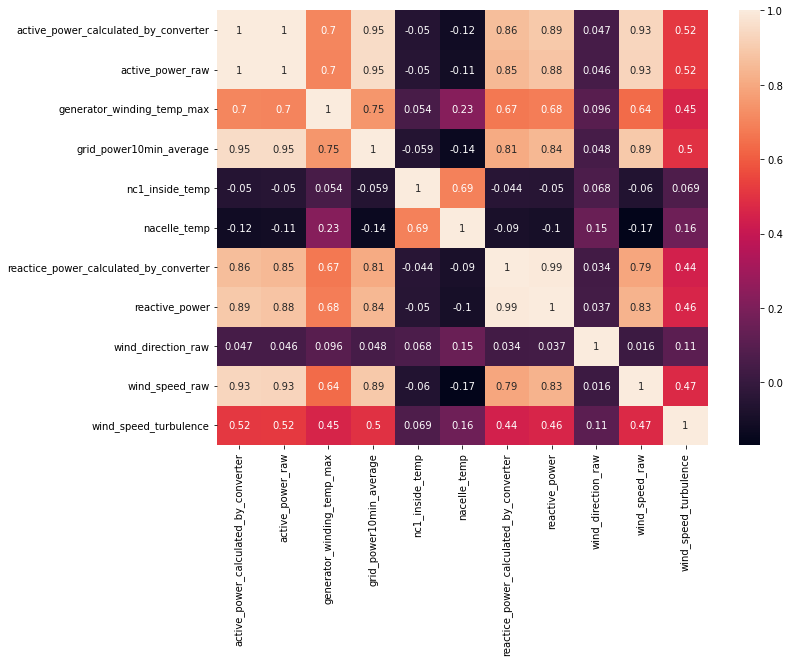

In [122]:
plt.figure(figsize=(11,8))
sns.heatmap(data = cor ,annot = True)

In [68]:
X = train
Y = train

In [69]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2,random_state = 4)

In [112]:
train_x.head()

,active_power_calculated_by_converter,active_power_raw,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
159148,1023.966899,1049.454692,68.387000,1165.620056,33.645292,29.791951,169.865087,212.085192,170.255750,7.065671,0.739647
371082,918.638387,953.154633,72.202031,1011.682605,32.551432,35.427149,45.674715,73.855466,280.155111,6.689568,1.339575
174568,537.993907,551.171855,59.542122,749.561035,31.451741,32.738178,103.314701,127.914352,308.988078,6.097457,0.961414
358518,1259.525350,1294.596700,61.091511,889.264842,34.307854,31.224022,208.303302,257.068314,116.641566,8.844446,1.047169
503404,75.294046,72.972647,54.924587,7.111785,32.999921,33.713699,1.614432,1.725030,304.912353,4.098027,0.686239


In [72]:
mode1 = LinearRegression()
mode1.fit(train_x,train_y)

LinearRegression()

In [73]:
prediction = mode1.predict(test_x)

In [75]:
##CALCULATE THE ERROR
np.mean((prediction-test_y)**2)

active_power_calculated_by_converter      6.273731e-26
active_power_raw                          2.040831e-24
generator_winding_temp_max                6.633689e-27
grid_power10min_average                   7.786537e-25
nc1_inside_temp                           8.552386e-28
nacelle_temp                              6.580759e-28
reactice_power_calculated_by_converter    1.469213e-26
reactive_power                            1.377479e-26
wind_direction_raw                        3.667413e-27
wind_speed_raw                            2.647994e-29
wind_speed_turbulence                     1.301852e-30
dtype: float64

In [ ]:
pd.DataFrame({'actual':test_y,'prediction':prediction,'diff':test_y-prediction})